### Title: Data exploration
### Author: Agnes Piecyk
### Content: !!! Work in progress!!! (1) imports data from 0_DataPreparation (2) feature engineering (3) data exploration

In [37]:
# import libraries
import pandas as pd # library for data manipulation
import matplotlib.pyplot as plt # library for data visualization
from scipy import stats # library for statistical tests


In [38]:
# import merged_data.csv from 0_DataPreparation
df = pd.read_csv('/workspaces/bakery_prediction_data_science_and_ml/0_DataPreparation/merged_data_withoutNaN.csv')

## inspect data
print(df.head())

        Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353         6.0     17.8375   
1  2013-07-03            1  111.885594         7.0     21.0750   
2  2013-07-04            1  168.864941         7.0     18.8500   
3  2013-07-08            1  135.500244         0.0     22.7250   
4  2013-07-10            1  135.132314         2.0     19.6875   

   Windgeschwindigkeit  Wettercode  KielerWoche  
0                   15        20.0            0  
1                    6        61.0            0  
2                    7        20.0            0  
3                   10         5.0            0  
4                   13         5.0            0  


In [39]:
# Working with the "Datum" data - first feature engineering

## Convert the date column to datetime
df["Datum"] = pd.to_datetime(df["Datum"])
## Create a new column for the day of the week
df["Wochentag"] = df["Datum"].dt.day_name()
## Create a new column for the month
df["Monat"] = df["Datum"].dt.month_name()
## Create a new column for the year
df["Jahr"] = df["Datum"].dt.year

In [40]:
# check the new dataframe
print(df.head())
print(df.info)

       Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0 2013-07-01            1  148.828353         6.0     17.8375   
1 2013-07-03            1  111.885594         7.0     21.0750   
2 2013-07-04            1  168.864941         7.0     18.8500   
3 2013-07-08            1  135.500244         0.0     22.7250   
4 2013-07-10            1  135.132314         2.0     19.6875   

   Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag Monat  Jahr  
0                   15        20.0            0     Monday  July  2013  
1                    6        61.0            0  Wednesday  July  2013  
2                    7        20.0            0   Thursday  July  2013  
3                   10         5.0            0     Monday  July  2013  
4                   13         5.0            0  Wednesday  July  2013  
<bound method DataFrame.info of           Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0    2013-07-01            1  148.828353         6.0     17.8375   
1  

In [41]:
# Further data exploration

## check occurences of each value in the column "Warenguppe"
print(df["Warengruppe"].value_counts()) # Warengruppe "6" ("Saisonbrot") and "4" ("Konditorei") have fewer occurences than the rest

## check occurences of each value in the column "Bewoelkung"
print(df["Bewoelkung"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Windgeschwindigkeit"
print(df["Windgeschwindigkeit"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Wettercode"
print(df["Wettercode"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Wochentag"
print(df["Wochentag"].value_counts())

## check occurences of each value in the column "Monat"
print(df["Monat"].value_counts())

## check occurences of each value in the column "Jahr"
print(df["Jahr"].value_counts())

Warengruppe
1    1360
2    1360
3    1360
5    1360
4    1323
6     246
Name: count, dtype: int64
Bewoelkung
7.0    2688
6.0    1076
5.0     664
8.0     600
0.0     583
4.0     474
3.0     349
2.0     289
1.0     286
Name: count, dtype: int64
Windgeschwindigkeit
10    850
8     712
9     679
12    659
7     557
11    497
13    415
6     405
15    382
14    322
16    311
5     247
18    208
17    174
4     149
19    129
20     98
21     61
24     42
23     30
22     19
25     17
3      16
29     15
28     10
35      5
Name: count, dtype: int64
Wettercode
61.0    2271
21.0    1013
0.0      815
10.0     742
5.0      562
63.0     535
20.0     244
95.0     137
65.0     111
45.0      96
22.0      88
71.0      81
28.0      63
49.0      48
73.0      48
77.0      45
53.0      31
69.0      27
75.0      25
68.0      12
79.0       5
3.0        5
17.0       5
Name: count, dtype: int64
Wochentag
Saturday     1029
Tuesday      1017
Friday       1012
Thursday     1000
Sunday        998
Wednesday     9

In [42]:
## Investigate in which months "Warengruppe" "6" ("Saisonbrot") has been sold
print(df[df["Warengruppe"] == 6]["Monat"].value_counts()) # "Saisonbrot" wird hauptsächlich im Winter verkauft

Monat
December    120
November    112
October       9
January       5
Name: count, dtype: int64


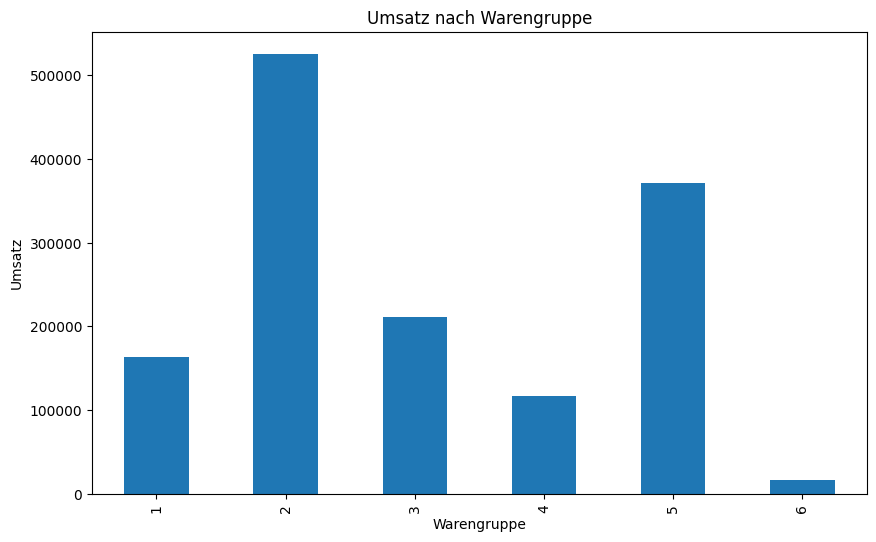

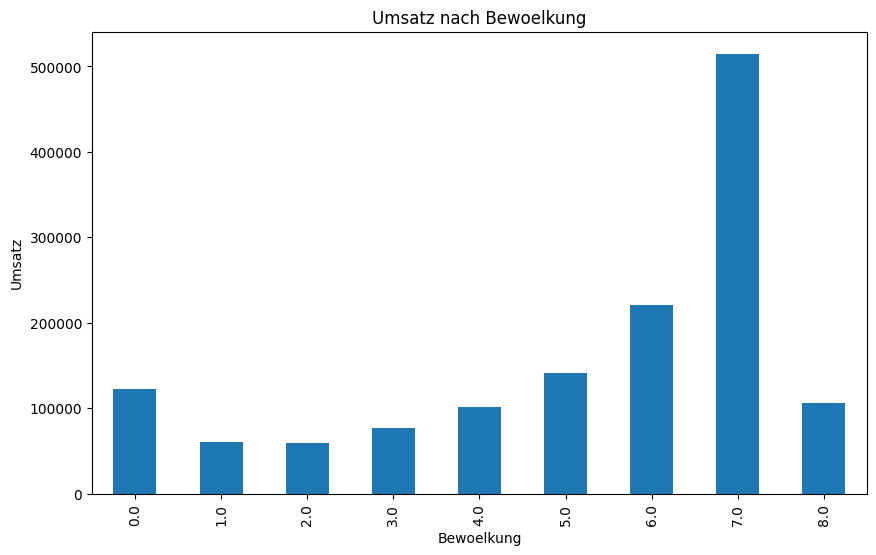

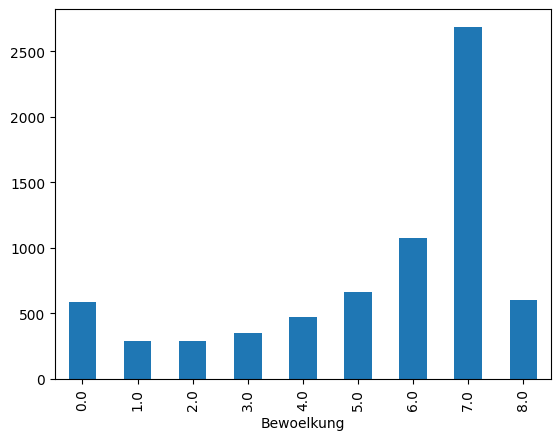

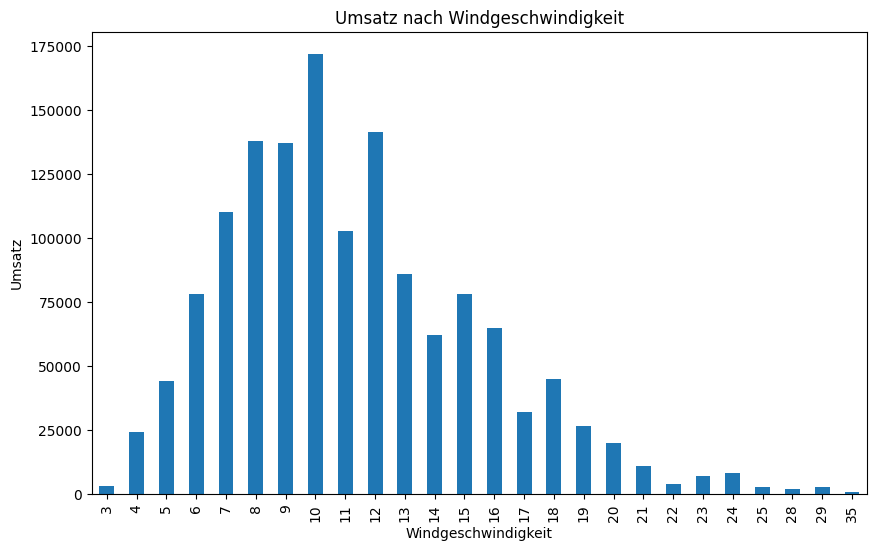

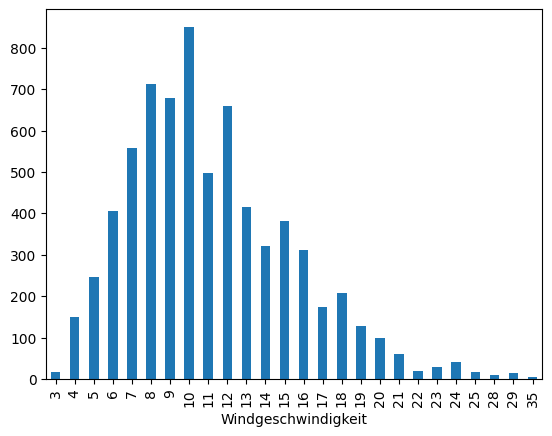

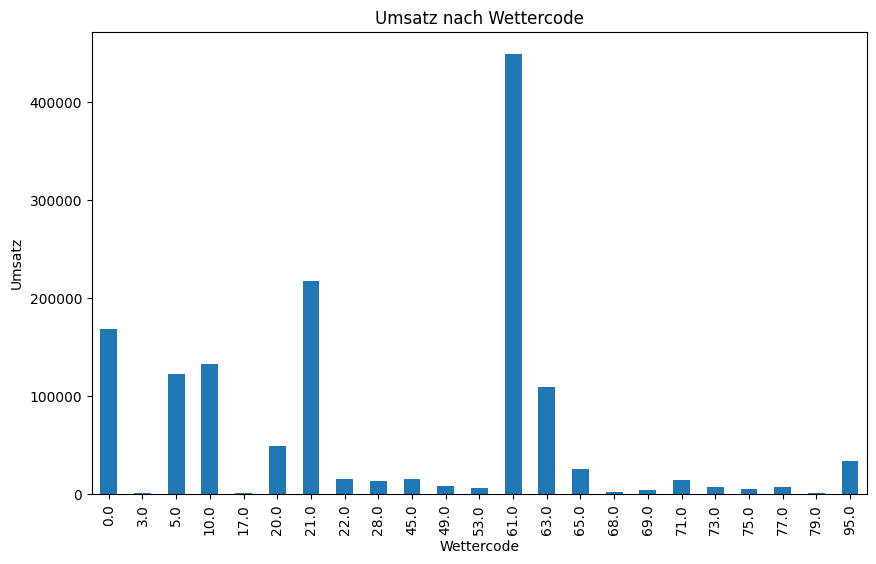

/tmp/ipykernel_13136/3231029148.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Wochentag")["Umsatz"].sum().plot(kind="bar")


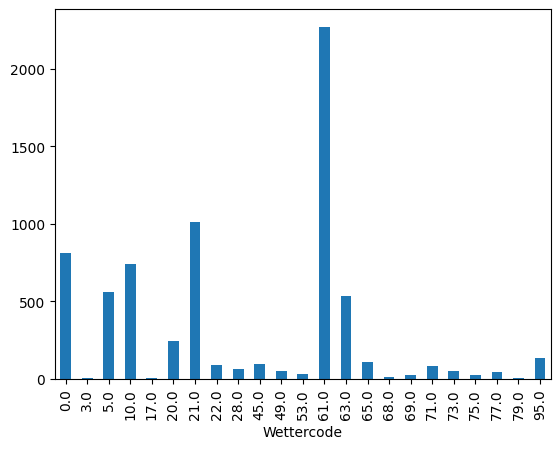

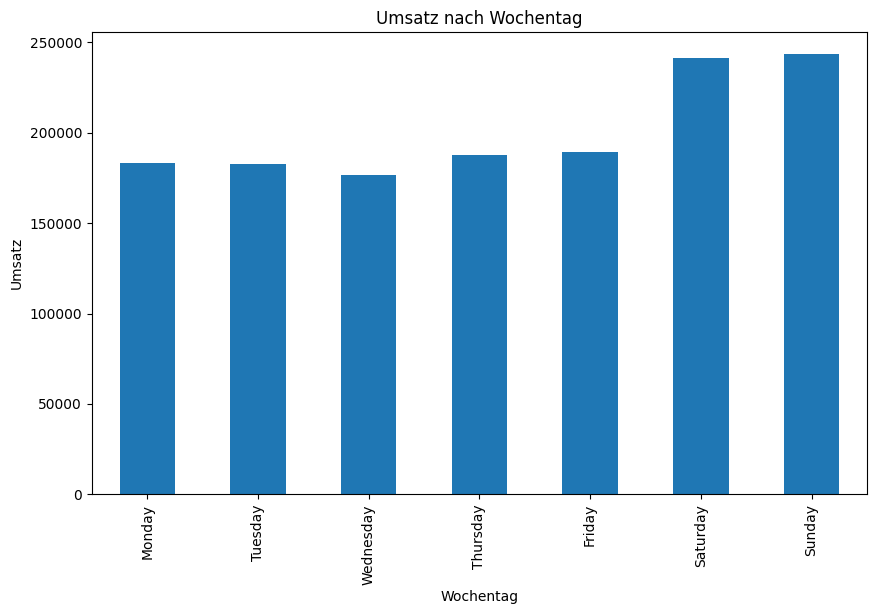

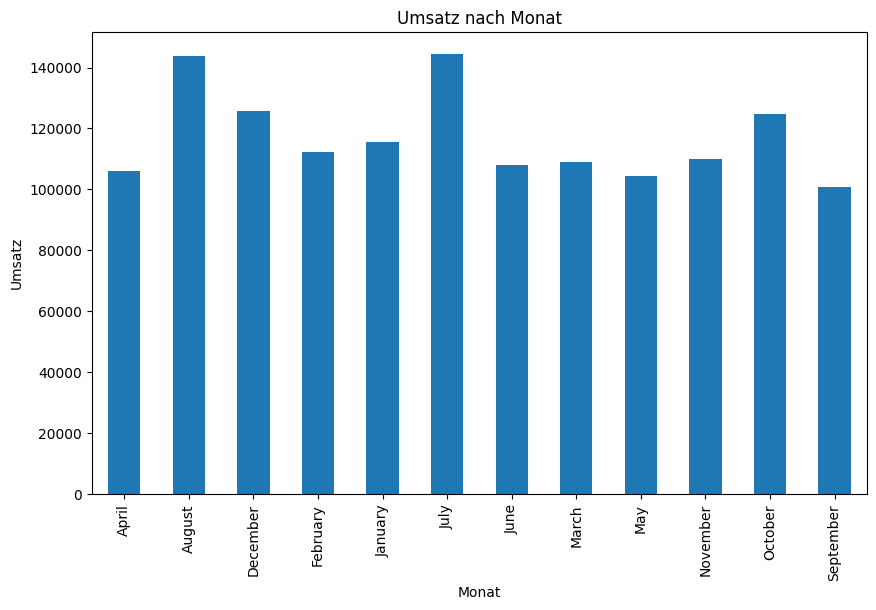

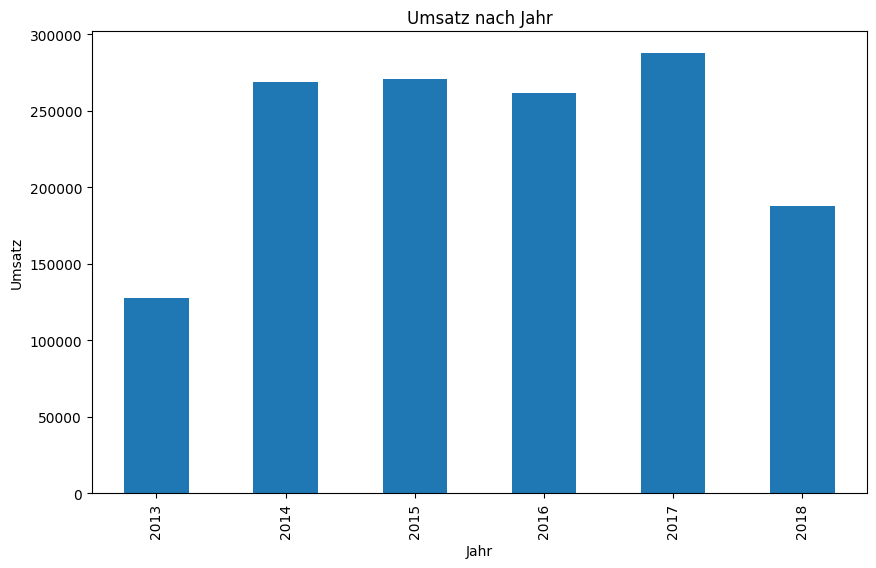

In [ ]:
# data visualization

## plot "Umsatz" according to "Warengruppe"
plt.figure(figsize=(10,6))
df.groupby("Warengruppe")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Warengruppe")
plt.xlabel("Warengruppe")
plt.ylabel("Umsatz")
plt.show()

## plot "Umsatz" according to "Bewoelkung"
plt.figure(figsize=(10,6))
df.groupby("Bewoelkung")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Bewoelkung")
plt.xlabel("Bewoelkung")
plt.ylabel("Umsatz")
plt.show()
### die Bewölkung beeinflusst vermutlich nicht das Kaufverhalten der Kunden; in Kiel ist es einfach meist bewölkt
## plot occurences of "Bewoelkung" and order the values ascending
df["Bewoelkung"].value_counts().sort_index().plot(kind="bar")
### die Häufigkeit der Werte für "Bewoelkung" korreliert mit dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

### "Temperatur" muss zunächst gebinnt werden, um die Korrelation mit "Umsatz" zu untersuchen; ggfs. gibt es hier einen Interaktoinseffekt

## plot "Umsatz" according to "Windgeschwindigkeit"
plt.figure(figsize=(10,6))
df.groupby("Windgeschwindigkeit")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Windgeschwindigkeit")
plt.xlabel("Windgeschwindigkeit")
plt.ylabel("Umsatz")
plt.show()
## plot occurences of each value in the column "Windgeschwindigkeit" and order the values ascending
df["Windgeschwindigkeit"].value_counts().sort_index().plot(kind="bar")
### auch hier gibt es eine Korrelatoin zwischen der Häufigkeit der Windgeschwindigkeiten und dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

## plot "Umsatz" according to "Wettercode"
plt.figure(figsize=(10,6))
df.groupby("Wettercode")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Wettercode")
plt.xlabel("Wettercode")
plt.ylabel("Umsatz")
plt.show()
## plot occurences of each value in the column "Wettercode" and order the values ascending
df["Wettercode"].value_counts().sort_index().plot(kind="bar")
### auch hier gibt es eine Korrelatoin zwischen der Häufigkeit der Windgeschwindigkeiten und dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

## plot "Umsatz" according to "Wochentag" and order from "Monday" to "Sunday"
#df["Wochentag"] = pd.Categorical(df["Wochentag"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
plt.figure(figsize=(10,6))
df.groupby("Wochentag")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Umsatz")
plt.show()
### die Umsätze scheinen am Wochenende am höchsten zu sein

## plot "Umsatz" according to "Monat"
plt.figure(figsize=(10,6))
df.groupby("Monat")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Monat")
plt.xlabel("Monat")
plt.ylabel("Umsatz")
plt.show()

## plot "Umsatz" according to "Jahr"
plt.figure(figsize=(10,6))
df.groupby("Jahr")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Jahr")
plt.xlabel("Jahr")
plt.ylabel("Umsatz")
plt.show()


<Axes: xlabel='Bewoelkung'>

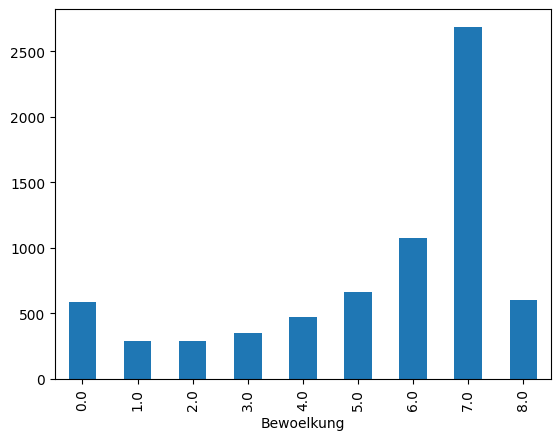

In [ ]:
# Grouping values in the columns "Bewoelkung", "Temperatur", "Windgeschwindigkeit" and "Wettercode" into fewer categories

## plot occurences of "Bewoelkung" and order the values ascending
df["Bewoelkung"].value_counts().sort_index().plot(kind="bar")

## Bewoelkung: "0" = "wolkenlos"; "1-2" = "heiter", "3" = "leicht bewoelkt", "4-6" = "wolkig", "7" = "stark bewökt", "8" = "bedeckt"
#bins = [0, 1, 2, 3, 4, 6, 7, 8]
#labels = ["wolkenlos", "heiter", "leicht_bewoelkt", "wolkig", "stark_bewoelkt", "bedeckt"]

#df["Bewoelkung"] = pd.cut(df["Bewoelkung"], bins=bins, labels=labels)

## plot occurences of each value in the column "Windgeschwindigkeit" and order the values ascending
#df["Windgeschwindigkeit"].value_counts().sort_index().plot(kind="bar")


## plot "Umsatz" according to "Windgeshwindigkeit"
#df.groupby("Windgeschwindigkeit")["Umsatz"].mean().sort_index().plot(kind="bar")


## Windgeschwindigkeit: "0-3" = "Sille bis leiser Zug", "4-6" = "leichte Brise",  "7-10" = "schwache Brise", "11-16" = "mäßige Brise", "17-21" = "frische Brise", "22-35" "starker Wind"

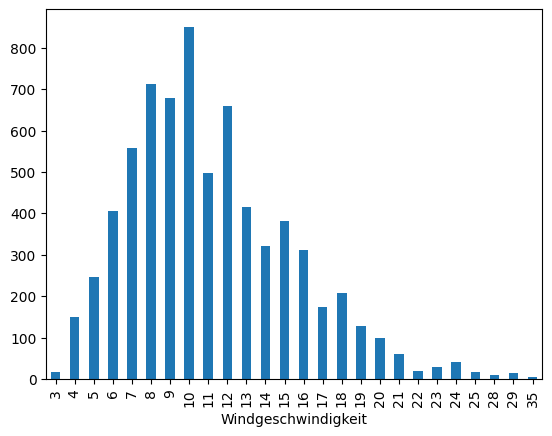